In [24]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pylab
from scipy import stats

In [2]:
songs = pd.read_csv("weeklySongsWithPopularity.csv",sep=",")
songs = songs[songs["Spotify_Popularity"] > 0]

In [7]:
rank1Songs = songs[songs["Rank"] == 1]
rank1Songs.head(10)

,date,Rank,Title,Artist,Weeks on chart,year,Spotify_Popularity
17600,1959-01-15,1,Smoke Gets In Your Eyes,The Platters,10.0,1959,62
17700,1959-01-22,1,Smoke Gets In Your Eyes,The Platters,11.0,1959,62
17800,1959-02-01,1,Smoke Gets In Your Eyes,The Platters,12.0,1959,62
17900,1959-02-08,1,Stagger Lee,Lloyd Price,10.0,1959,36
18000,1959-02-15,1,Stagger Lee,Lloyd Price,11.0,1959,36
18100,1959-02-22,1,Stagger Lee,Lloyd Price,12.0,1959,36
18200,1959-03-01,1,Stagger Lee,Lloyd Price,13.0,1959,36
19100,1959-05-08,1,The Happy Organ,"Dave ""Baby"" Cortez",9.0,1959,7
19200,1959-05-15,1,Kansas City,Wilbert Harrison,6.0,1959,44
19300,1959-05-22,1,Kansas City,Wilbert Harrison,7.0,1959,44


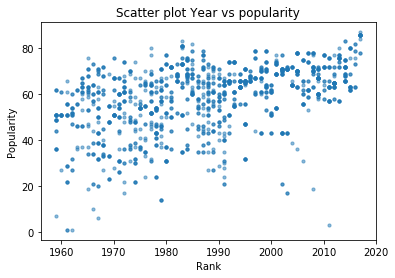

In [33]:
import matplotlib.pyplot as plt
rank1Songs['date'] = pd.to_datetime(rank1Songs['date'],format="%Y-%m-%d")
rank1Songs['year'] = rank1Songs['date'].dt.year
trainX = rank1Songs["year"]
trainY = rank1Songs["Spotify_Popularity"]
plt.scatter(trainX, trainY, alpha=0.5,s=10)
plt.title('Scatter plot Year vs popularity')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

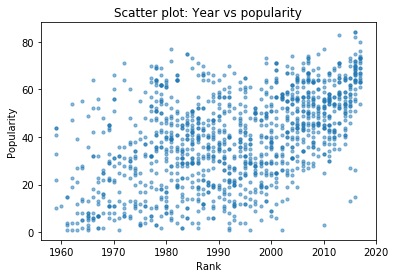

In [32]:
rank100Songs = songs[songs["Rank"] == 100]
rank100Songs['date'] = pd.to_datetime(rank100Songs['date'],format="%Y-%m-%d")
rank100Songs['year'] = rank100Songs['date'].dt.year
trainX = rank100Songs["year"]
trainY = rank100Songs["Spotify_Popularity"]
plt.scatter(trainX, trainY, alpha=0.5,s=10)
plt.title('Scatter plot: Year vs popularity')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [18.0, 20.0]
fig=plt.figure(1)
fig.subplots_adjust(hspace=.5)
fig.add_subplot(721)

for index, row in popularArtists.iterrows():
    artistSongs = uniqueSongs[uniqueSongs["Artist"] == row['Artist']]
    minmYear = min(artistSongs["year"])
    if minmYear > 1990:
        continue
        
    count = count + 1
    if count > 14:
        break
    
    plt.subplot(7, 2, count)
    plt.plot(artistSongs['year'], artistSongs['Spotify_Popularity'], 'o')
    plt.xlabel('Year of first appearence on chart')
    plt.ylabel('Spotify Popularity')
    plt.title(artistSongs['Artist'].iloc[0], fontsize=15)
    
plt.show()


In [105]:
#threshold = 5
import numpy as np
appended_data = []
for i in range(1, 11):
    rankISongs = songs[songs["Rank"] == i]
    
    trainX = rankISongs["year"]
    trainY = rankISongs["Spotify_Popularity"]
    
    quartile_1, quartile_3 = np.percentile(rankISongs["Spotify_Popularity"], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    outliers = rankISongs[(rankISongs["Spotify_Popularity"] > upper_bound) | (rankISongs["Spotify_Popularity"] < lower_bound)]
    appended_data.append(outliers)

df = pd.concat(appended_data)
gr = df.drop_duplicates(subset=['Title','Artist'])
gr.sort_values('Spotify_Popularity').head(10) #underperforming songs

,year,Rank,Artist,Title,Spotify_Popularity
102,1961,3,Highwaymen,Michael,5
108,1961,9,Dee Clark,Raindrops,8
1905,1979,6,Gloria Gaynor,I Will Survive,15
5103,2011,4,Katy Perry feat. Kanye West,E.T.,23
106,1961,7,Chubby Checker,Pony Time,23
1409,1974,10,Mac Davis,One Hell Of A Woman,23
1106,1971,7,Donny Osmond,Go Away Little Girl,28
1407,1974,8,Ray Stevens,The Streak,31
1406,1974,7,MFSB,TSOP,32
2907,1989,8,Milli Vanilli,Girl You Know Its True,33


In [12]:
import pandas as pd
lastfm = pd.read_csv('weekly_lastfm_listener.csv')
lastfm = lastfm[lastfm['Listener Count']>0]
r_lastfm = lastfm.drop_duplicates(subset=['Title','Artist'])
r_lastfm.sort_values('Listener Count',ascending = False).head(10)

,year,Rank,Title,Artist,Listener Count,Spotify_Popularity
1539,1992,32,Smells Like Teen Spirit,Nirvana,2037819,75
2303,2005,16,Mr. Brightside,The Killers,1951357,79
1809,1996,56,Wonderwall,Oasis,1865894,73
2465,2008,13,Viva La Vida,Coldplay,1619646,79
2548,2009,55,Viva la Vida,Coldplay,1619646,79
2230,2003,81,Clocks,Coldplay,1605138,75
1524,1992,8,Under The Bridge,Red Hot Chili Peppers,1514891,82
2314,2005,37,Feel Good Inc,Gorillaz,1468734,80
2514,2009,2,Poker Face,Lady Gaga,1423143,69
2139,2002,7,In the End,Linkin Park,1387805,83


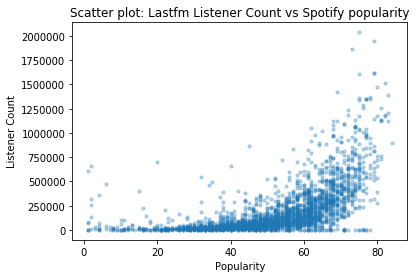

In [35]:
import matplotlib.pyplot as plt
#gr_fm = r_lastfm[r_lastfm["Listener Count"] >=250000]
trainY = r_lastfm["Listener Count"]
trainX = r_lastfm["Spotify_Popularity"]
plt.scatter(trainX, trainY, alpha=0.3,s=10)
plt.title('Scatter plot: Lastfm Listener Count vs Spotify popularity')
plt.ylabel('Listener Count')
plt.xlabel('Popularity')
plt.show()

In [44]:
#scraping Last.fm data
# Application name	DataScience
# API key	c28576b5f1689fc793bd5d792f705225
# Shared secret	2822380215c3686bf3f874d550328154
# Registered to	mmohini97

songs = pd.read_csv("songsWithPopularity.csv",sep=",")
songs = songs[songs["Spotify_Popularity"] > 0]

#getting last fm data
import pylast
import urllib2,urllib
import json
API_KEY = "c28576b5f1689fc793bd5d792f705225"  
API_SECRET = "2822380215c3686bf3f874d550328154"
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET)
#df = pd.DataFrame(columns=['year','Rank','Title', 'Artist','Listener Count','Spotify_Popularity'])
df = pd.DataFrame(columns=['year','Rank','Title', 'Artist','Listener Count','Play Count','Spotify_Popularity'])
ind = 0
for idx,row in songs.iterrows():
    title = urllib.quote(row['Title'])
    artist = urllib.quote(row['Artist'])
    #url = "http://ws.audioscrobbler.com/2.0/?method=track.search&track="+title+"&artist="+artist+"&api_key=c28576b5f1689fc793bd5d792f705225&format=json"
    url = "http://ws.audioscrobbler.com/2.0/?method=track.getInfo&api_key="+API_KEY+"&artist="+artist+"&track="+title+"&format=json"
    response = urllib2.urlopen(url)
    record = response.read()
    obj = json.loads(record)
    if 'track' in obj:
        track = obj['track']
        listener = int(track['listeners'].decode('utf-8').strip())
        playcount = int(track['playcount'].decode('utf-8').strip())
        print track['listeners'],track['playcount']
        if track:
            df.loc[ind] = [row['year'],row['Rank'],row['Title'],row['Artist'],listener,playcount,row['Spotify_Popularity']]
            ind +=1

3 4
18918 76412
85812 306928
22421 59609
14795 39984
447 770
12885 36633
180762 645247
47469 133148
254759 1023738
6738 16837
8422 22974
7682 24449
17742 43772
29999 72182
7004 16698
9152 18016
40095 100424
238539 918862
138 306
81875 275751
301 663
35364 95231
16 29
128983 426883
9940 21984
292753 1309506
18968 45225
21880 55482
52765 143294
3519 9498
1756 4485
4799 15169
28227 104833
27634 70936
527 1868
89010 335327
139709 555254
8031 20478
38005 104782
38517 108844
25946 54181
89146 243879
6884 17324
41792 132045
6535 16636
53527 142794
11806 28226
358269 1538050
20549 60869
5988 17889
17704 69377
172148 549444
34799 109832
111957 389309
71775 245131
81212 246253
16734 51381
4 50
140 254
34829 81795
47139 136648
824 2167
611 2109
31368 70924
15 27
12428 32692
7412 19065
125498 320862
441 906
61493 191545
48065 156104
1476 5287
88755 299706
7137 25589
7746 26926
7 14
88087 389099
18328 53530
3789 8674
12109 32706
68862 159866
1750 4566
4763 10666
4967 11671
2815 9136
6315 14480
2452

112862 382582
120511 539103
480373 2224296
71284 249196
267504 892292
5566 19000
345199 1512574
185110 636161
11166 35416
109128 425219
99921 283710
94988 302694
72 155
267268 1171424
25552 87115
5 5
12387 28002
150558 554752
8168 18525
390254 1743733
12466 31424
346119 1220619
39674 156640
4910 18839
2803 6365
4766 10492
2205 5661
2832 8650
18746 51408
139 191
41860 108962
2034 5259
98441 331624
81977 277918
133796 431569
28813 86481
23370 87535
210905 719645
343050 1452454
261405 1077070
158 370
104228 342981
2260 8488
172435 629696
233090 1065743
84328 309733
178018 627079
101263 313335
1662 4620
118071 364162
26125 78092
489 1224
26773 81368
124719 313727
87645 325930
202539 979454
68216 194533
158151 610869
33078 99459
34850 98269
49534 157258
12178 39677
31963 106508
3859 10180
18861 50089
19387 58536
63499 280418
10061 25696
48974 186284
37662 139245
93268 340930
348 1358
46853 132091
68244 238095
47923 129421
1366 4287
112441 423978
81716 279231
845384 4873072
39213 113435
9076

208432 815010
183673 617538
554543 2967997
732614 3463542
241870 931124
663691 3188150
167998 558721
139358 546192
273258 1323343
249343 938478
53072 163775
284259 1069027
110526 500977
377284 1661620
53831 154643
115539 376572
144621 519981
143351 569711
213872 1077975
237056 1004978
249370 1236751
295991 1213800
472291 1980265
206907 741329
391850 1739550
100457 370528
78013 251654
32485 148649
85134 298973
24885 120025
79560 247540
87858 290181
78286 275892
313031 1343878
12345 40904
170276 668826
40675 94504
32844 97170
50210 164528
76391 269960
161687 579021
231992 1158000
133074 573253
298440 1253882
49695 179968
95335 338201
201662 808041
1037905 5204059
313874 1512121
108035 402892
51251 160493
13900 52779
23451 61463
243923 961529
223984 869061
205869 886555
13266 34463
9237 32489
29455 72517
144730 435970
954 3320
87857 331855
33602 198258
120800 405367
43441 122357
22936 59564
488283 2455420
429978 1671865
426363 1890077
173910 560927
163276 818113
655088 3740995
732604 4209

654 2538
2 5
53838 117264
143085 620376
91030 418300
434462 1972886
15876 65286
45229 203156
164617 641070
620366 2814360
222197 1141463
53306 185908
48783 194112
4165 16267
414987 2145833
20599 62288
128068 403666
11907 48632
278661 1645993
190523 644428
103584 302004
184115 944143
10978 24329
498071 2204591
63030 208755
6 29
162858 580559
347859 1787172
180534 476198
1589 6179
967 3192
188820 869095
43210 144147
48909 174212
501015 2201022
72626 545434
98952 611216
3705 12007
10177 30098
26607 89137
51801 204967
90171 313887
65617 188416
771748 3148006
44744 155228
1881 6235
125607 446910
38925 111228
17383 44198
3887 9938
141277 472639
511697 2843340
20085 51940
81109 221897
86557 357359
36594 133705
1425 3741
293407 1242757
232103 885374
44794 131955
1893 5365
85472 341504
318558 1439455
155479 548209
133703 603347
296782 1346937
123803 388224
498071 2204591
49 305
90171 313887
70320 236286
47519 134896
348024 1510863
44422 138687
72400 258274
112110 352607
77442 264383
62189 16672

295287 1288052
16364 63395
35433 99328
259876 1368264
459474 2555690
73062 270327
31967 110817
342145 1516495
8910 26288
957377 3324659
117102 325329
363952 1335488
334092 1883563
216517 587082
570095 3262658
409843 1261174
615870 3142220
865628 5497070
136516 325945
769158 4199302
152128 389438
577366 2558676
95413 335097
164332 706726
157004 373856
1 2
172822 789385
136411 522601
11501 39178
590862 3380501
494223 2617177
193004 495800
105019 286737
163716 748608
66542 337715
183762 658377
68888 176185
1062258 7044311
95026 366505
50 153
197666 708314
74688 207070
43804 136591
402429 2000206
59497 317844
466264 3146767
33994 181896
1605138 11701539
110183 283203
2510 8089
163686 444119
48 12341
8153 23103
627847 3434681
40028 94164
52410 175854
11738 31006
35968 90380
881776 5469415
388410 1982185
30898 128541
120317 398193
378396 1178150
967912 5802301
797457 3612818
143747 547626
165685 526041
149476 506770
40094 155236
1062258 7044311
509041 2920436
318696 1531532
921351 7466654
33

218586 1137770
124301 687772
161048 831822
231663 1989983
53341 295269
60816 363102
73946 411597
194745 1157554
137330 898978
69164 256513
290985 2646595
249826 1378736
319676 2643170
39168 202535
307902 2647443
16 76
586795 6420444
55781 332872
1 22
221134 1391353
74223 312915
81328 420094
417604 3892594


In [90]:
#old_songs = df[df['year']<=1980]
df.sort_values(by=['Spotify_Popularity','Listener Count'],ascending = False).head(10)
want = df[df['Spotify_Popularity'] > 70]
want = want[want['Listener Count'] < 100]
#want = want[want['Title'] == "Take It Off"]
want.head(10)

,year,Rank,Title,Artist,Listener Count,Play Count,Spotify_Popularity
2523,2002,47,Cleanin’ out my Closet,Eminem,73,326,71
2857,2008,43,A Milli,Lil Wayne,6,43,75


In [47]:
df.to_csv('weekly_lastfm_playcount.csv',index=False)

In [62]:
import numpy
numpy.corrcoef(df['Play Count'].astype(float), df['Listener Count'].astype(float))[0,1]

0.9506229664177218

In [64]:
import numpy
numpy.corrcoef(df['Play Count'].astype(float), df['Spotify_Popularity'].astype(float))[0,1]

0.5109616896225868

In [65]:
import numpy
numpy.corrcoef(df['Listener Count'].astype(float), df['Spotify_Popularity'].astype(float))[0,1]

0.5962534085843015

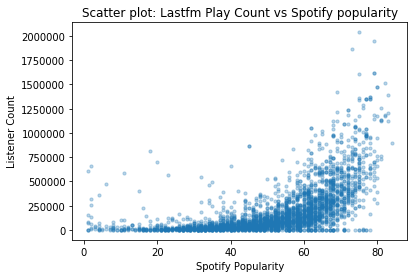

In [81]:
import matplotlib.pyplot as plt
trainX = df["Spotify_Popularity"]
trainY = df["Listener Count"]
plt.scatter(trainX, trainY, alpha=0.3,s=10)
plt.title('Scatter plot: Lastfm Play Count vs Spotify popularity')
plt.ylabel('Listener Count')
plt.xlabel('Spotify Popularity')
plt.show()

In [103]:
df['Listener Count'] = df['Listener Count'].astype('int')
df['Spotify_Popularity'] = df['Spotify_Popularity'].astype('int')
df['Play Count'] = df['Play Count'].astype('str')
meanPop = df.groupby('year').mean().reset_index()
meanPop.sort_values('Listener Count',ascending=False).head(10)

,year,Listener Count,Spotify_Popularity
49,2009,487215.591549,65.056338
50,2010,474442.526316,61.350877
46,2006,451572.345455,66.054545
47,2007,443479.980769,63.000000
48,2008,433154.981481,63.555556
45,2005,405036.135593,62.694915
44,2004,360813.851852,60.074074
51,2011,360657.906250,60.000000
52,2012,330149.530303,65.378788
43,2003,286866.603774,57.396226


In [101]:
meanPop.sort_values('Spotify_Popularity',ascending=False).head(10)

,year,Listener Count,Spotify_Popularity
46,2006,451572.345455,66.054545
52,2012,330149.530303,65.378788
49,2009,487215.591549,65.056338
48,2008,433154.981481,63.555556
47,2007,443479.980769,63.000000
45,2005,405036.135593,62.694915
50,2010,474442.526316,61.350877
39,1999,244692.901639,60.540984
44,2004,360813.851852,60.074074
51,2011,360657.906250,60.000000
